In [136]:
import pickle
import seaborn as sns
sns.set_theme(style='ticks')
import matplotlib.colors as mcolors
palet=list(mcolors.TABLEAU_COLORS)
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt


def get_str(flex_max_length, fill_0):
    return f"{'Flexible' if flex_max_length else 'Fixed'} Max Length\n{'Filled' if fill_0 else 'Not filled'} with 0"

In [137]:
configs = [(True, True), (False, True), (True, False), (False, False)]
data = []
for max_length, fill_0 in configs:
    data.append(pickle.load(
        open(f't5-large_obqa_fact_epoch_1_{max_length}_{fill_0}_loss.pkl', 'rb')))

# DATA 1 IS THE OPTION 2A

In [165]:
# x_new=0.9*x+a*0.1
# a=(x_new-0.9x)/0.1
def get_raw(datax):
    datax=np.array([0]+datax)
    return (datax[1:]-0.9*datax[:-1])/0.1
print(get_raw(data[0]).shape)
print(len(data[0]))

(992,)
992


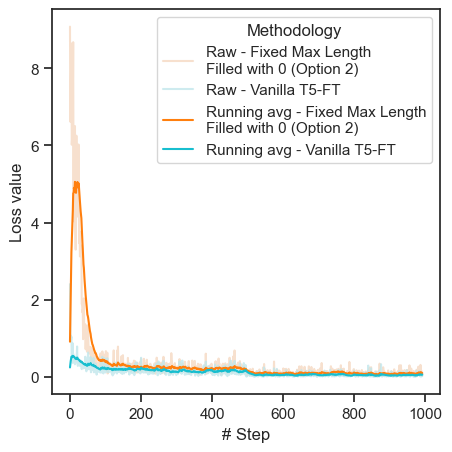

In [179]:
di = {'# Step': np.arange(len(data[0]))}
di[f'Running avg - {get_str(False, True)} (Option 2)']=data[1]
di[f'Raw - {get_str(False, True)} (Option 2)']=get_raw(data[1])
data_old= pickle.load(
                open(f'google-t5_old_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
di['Running avg - Vanilla T5-FT']=data_old
di['Raw - Vanilla T5-FT']=get_raw(data_old)
    
df = DataFrame(di).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Loss value'})  # value_vars=['Flexible Max Length-Fill 0']

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
chinh=[palet[1]]+[palet[9]]
chinh_light=[sns.light_palette(chinh[0])[1]]+[sns.light_palette(chinh[1])[1]]
sns.lineplot(df[df.Methodology.apply(lambda x:'Raw' in x)], x='# Step', y='Loss value', hue='Methodology', palette=chinh_light, alpha = 0.8,ax=ax)
sns.lineplot(df[df.Methodology.apply(lambda x:'avg' in x)], x='# Step', y='Loss value', hue='Methodology',palette=chinh,ax=ax)
fig.savefig('loss_mc_ed.png', bbox_inches='tight', dpi=300)


In [14]:

col_name = []
di = {'# Step': np.arange(len(data[0]))}
for idx, (Fixed, fill_0) in enumerate(configs):
    ss=get_str(Fixed, fill_0)
    if idx==1:
        ss=f'{ss} (Option 2a)'
    di[ss] = data[idx]

df = DataFrame(di).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Loss value'})  # value_vars=['Flexible Max Length-Fill 0']

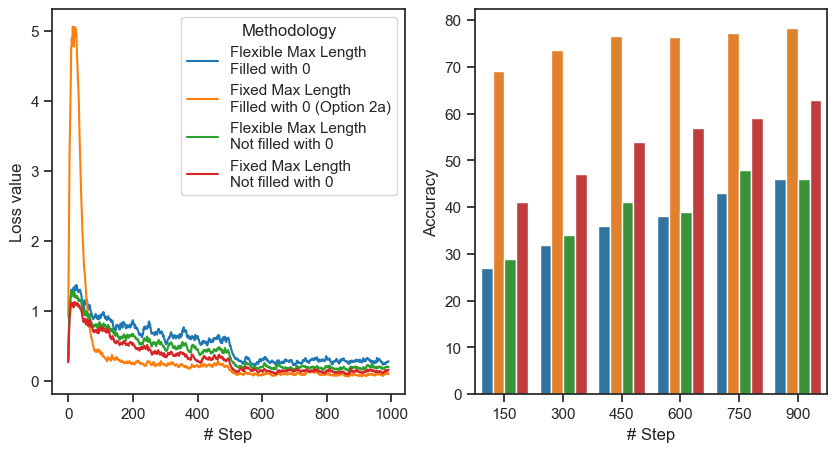

In [81]:
accuracy = [[27,32,36,38,43,46],
            [69,73.6,76.6, 76.4, 77.2, 78.4],
            [29,34,41,39,48,46],
            [41,47,54,57,59,63]]
steps = [150*(i+1) for i in range(len(accuracy[0]))]
di1 = {'# Step': steps}
data_prime=pickle.load(
        open('0_new_t5-large_obqa_fact_epoch_1_loss.pkl','rb'))
for idx, (flex_max_length, fill_0) in enumerate(configs):
    di1[get_str(flex_max_length, fill_0)] = accuracy[idx]
di[1]=data_prime
df1 = DataFrame(di1).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Accuracy'})
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(df, x='# Step', y='Loss value', hue='Methodology', ax=ax[0], palette=palet[:4])
sns.move_legend(ax[0], "upper right")
sns.barplot(df1, x='# Step', y='Accuracy', hue='Methodology', ax=ax[1], palette=palet[:4])
ax[1].legend().remove()
fig.savefig('options_mc_ed.png', bbox_inches='tight', dpi=300)

### Different scheme with fixed max length and filled 0

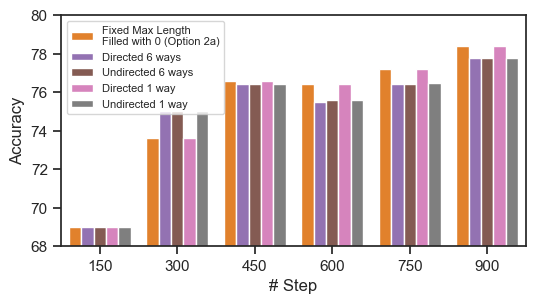

In [83]:
acc1 = [[69,73.6,76.6, 76.4, 77.2, 78.4],
        [69,75,76.4, 75.5,76.4,77.8],
        [69,75,76.4,75.6,76.4,77.8],
        [69, 73.6, 76.6, 76.4, 77.2, 78.4],
        [69,75,76.4,75.6, 76.5, 77.8]]
# acc1=[x[1:] for x in acc1]
acc_df = {'# Step': steps[:]}
scheme = ['Directed 6 ways', 'Undirected 6 ways',
          'Directed 1 way', 'Undirected 1 way']
prime = f'{get_str(flex_max_length=False, fill_0=True)} (Option 2a)'
acc_df[prime] = acc1[0]
acc_df[scheme[0]] = acc1[1]
acc_df[scheme[1]] = acc1[2]
acc_df[scheme[2]] = acc1[3]
acc_df[scheme[3]] = acc1[4]
acc_dfp = DataFrame(acc_df).melt(
    id_vars='# Step', var_name='Methodology').rename(columns={'value': 'Accuracy'})

loss_df = {'# Step': np.arange(len(data[1]))}
loss_df[prime] =  data_prime
loss_df[scheme[0]] = pickle.load(
    open(f'1_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[1]] = pickle.load(
    open(f'Scheme.UNDIRECTED_6W_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[2]] = pickle.load(
    open(f'3_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_df[scheme[3]] = pickle.load(
    open(f'Scheme.UNDIRECTED_1W_new_t5-large_obqa_fact_epoch_1_loss.pkl', 'rb'))
loss_dfp = DataFrame(loss_df).melt(id_vars='# Step', var_name='Methodology').rename(
    columns={'value': 'Loss value'})  # value_vars=['Flexible Max Length-Fill 0']
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.barplot(acc_dfp, x='# Step', y='Accuracy', hue='Methodology', palette=[palet[1]]+palet[4:8])
ax.legend(fontsize=8  )#bbox_to_anchor=(1.5,1))#ax, "right")
ax.set_ylim(68,80)
fig.savefig('hyper_vs_option2a.png',bbox_inches='tight',dpi=300)
# ax.legend().remove()

/var/folders/95/g_7jr7j56ml5vc7fpqht1ncw0000gn/T/ipykernel_15363/2010709269.py:20: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  ax=sns.barplot(df_norm, x=x_label, y='L2 Norm', hue='Type',palette=sns.light_palette(palet[1])[-3:])


Mean diff 0.0106431395


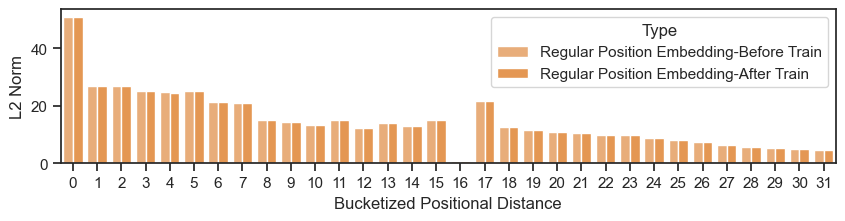

In [105]:
from numpy import linalg
# just to get the base line, does not matter what scheme, the before is the same
regular_before,_   = pickle.load(
    open('Scheme.Undirected_6w_weight_before.pkl', 'rb'))
regular_after   = pickle.load(
    open('Scheme.MC-ED_positional_emb.pkl', 'rb'))
kk={'Type':[],x_label:[],'L2 Norm':[]}
for index, m in enumerate(regular_before):
    kk['Type'].append('Regular Position Embedding-Before Train')
    kk[x_label].append(index)
    kk['L2 Norm'].append(linalg.norm(m))

for index, m in enumerate(regular_after):
    kk['Type'].append('Regular Position Embedding-After Train')
    kk[x_label].append(index)
    kk['L2 Norm'].append(linalg.norm(m))

df_norm = DataFrame(kk)
plt.rcParams['figure.figsize']=(10,2)
ax=sns.barplot(df_norm, x=x_label, y='L2 Norm', hue='Type',palette=sns.light_palette(palet[1])[-3:])
ax.figure.savefig('before_after_train_regular.png',bbox_inches='tight', dpi=300)
print('Mean diff',np.array([abs(linalg.norm(regular_before[i])-linalg.norm(regular_after[i])) for i in range(32)]).mean())

In [17]:
regular_after,hyper_weight_after = pickle.load(
    open('Scheme.UNDIRECTED_6W_weight_after.pkl', 'rb'))
regular_before, hyper_weight_before  = pickle.load(
    open('Scheme.Undirected_6w_weight_before.pkl', 'rb'))


In [98]:
hyper_color=sns.light_palette(palet[5])[-4:]
len(hyper_color)

4

Mean diff 0.0126831895


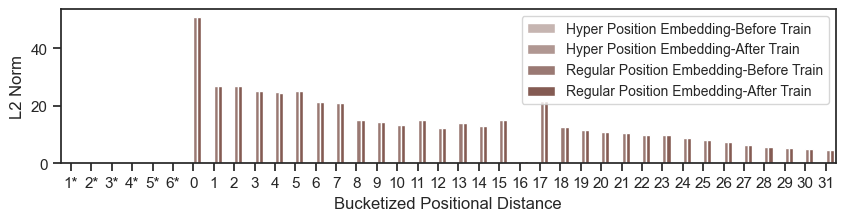

In [133]:
from numpy import linalg
x_label='Bucketized Positional Distance'
kk = {'Type': ['Hyper Position Embedding-Before Train']*6, x_label: [
    f'{x}*' for x in range(1, 7)], 'L2 Norm': [linalg.norm(x) for x in hyper_weight_before]}
for index, m in enumerate(hyper_weight_after):
    kk['Type'].append('Hyper Position Embedding-After Train')
    kk[x_label].append(f'{index+1}*')
    kk['L2 Norm'].append(linalg.norm(m))
for index, m in enumerate(regular_before):
    kk['Type'].append('Regular Position Embedding-Before Train')
    kk[x_label].append(index)
    kk['L2 Norm'].append(linalg.norm(m))

for index, m in enumerate(regular_after):
    kk['Type'].append('Regular Position Embedding-After Train')
    kk[x_label].append(index)
    kk['L2 Norm'].append(linalg.norm(m))

df_norm = DataFrame(kk)
plt.rcParams['figure.figsize']=(10,2)
ax=sns.barplot(df_norm, x=x_label, y='L2 Norm', hue='Type',palette=hyper_color)
ax.legend(fontsize=10)
ax.figure.savefig('hyper_32_6.png',bbox_inches='tight', dpi=300)
before=df_norm[df_norm.Type.apply(lambda x:'Before' in x)]['L2 Norm'].to_numpy()
after=df_norm[df_norm.Type.apply(lambda x:'After' in x)]['L2 Norm'].to_numpy()
print('Mean diff',np.array([abs(linalg.norm(before[i])-linalg.norm(after[i])) for i in range(len(before))]).mean())

Mean diff 0.023563454


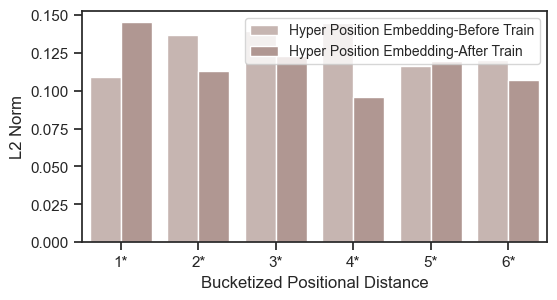

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
df1=df_norm[df_norm['Type'].apply(lambda x:'Hyper' in x)]
sns.barplot(df1, x=x_label,ax=ax, y='L2 Norm', hue='Type',palette=hyper_color[:2])
ax.legend(fontsize=10)
ax.figure.savefig('hyper_only_6.png',bbox_inches='tight', dpi=300)
before=df1[df1.Type.apply(lambda x:'Before' in x)]['L2 Norm'].to_numpy()
after=df1[df1.Type.apply(lambda x:'After' in x)]['L2 Norm'].to_numpy()
print('Mean diff',np.array([abs(linalg.norm(before[i])-linalg.norm(after[i])) for i in range(len(before))]).mean())

In [125]:
after.to_numpy()
# [linalg.norm(after[i]) for i in range(6)]

array([0.14509049, 0.11276233, 0.12302971, 0.09551971, 0.11979324,
       0.10673281], dtype=float32)

0.0106431395